In [1]:
# Importing required framework libraries for ploting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats #for qq plots

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

#Train-Test split
from sklearn.model_selection import train_test_split

#Pickel to save the features
import pickle

In [2]:
# Read the Data
df = pd.read_csv('house_prices.csv')
print(">>Shape of Original Data: ",df.shape)
df.head(5)

>>Shape of Original Data:  (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# to eliminate null labled values
df = df[df['price'].notnull()]
df.shape

(13320, 9)

In [4]:
# to reduce size and reduce computation power
df = df.sample(frac=0.5,random_state=200)
df.shape

(6660, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               5
society         2753
total_sqft         0
bath              35
balcony          321
price              0
dtype: int64

# Train Test split  
use stratify and shuffel for preserving and proper distribution of data

In [6]:
# Train Test split of Data for generalised error with stratify and shuffel to maintain the distribution quality
X, X_test, y, y_test = train_test_split(df.drop('price', axis=1), df['price'],
                                        random_state=0,  test_size=0.2,
                                        shuffle=True)

In [7]:
# End of Session Datacheck
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(5328, 8)
(5328,)
(1332, 8)
(1332,)


In [8]:
#Check for null values in the Train and Test Data
print("Null values in the Training feature: ")
display(pd.DataFrame(X).isnull().sum())
print("Null values in the Test feature: ")
display(pd.DataFrame(X_test).isnull().sum())

#Check for null values in the Target
print("Null values in the Training feature: ")
display(y.isnull().sum())
print("Null values in the Test feature: ")
display(y_test.isnull().sum())

Null values in the Training feature: 


area_type          0
availability       0
location           0
size               4
society         2180
total_sqft         0
bath              25
balcony          266
dtype: int64

Null values in the Test feature: 


area_type         0
availability      0
location          0
size              1
society         573
total_sqft        0
bath             10
balcony          55
dtype: int64

Null values in the Training feature: 


0

Null values in the Test feature: 


0

In [9]:
# Check the Preprocessed column values in the training and testing feature DataSet
print(">>Number of Unique values in the Training feature Data: ",y.nunique())
#print("Unique values in the Training feature Data: ",y.unique())
print(">>Number of Unique values in the Testing feature Data: ",y_test.nunique())
#print("Unique values in the Testing feature Data: ",y_test.unique())

>>Number of Unique values in the Training feature Data:  1104
>>Number of Unique values in the Testing feature Data:  471


# Study of columns

In [10]:
## Description of the DataSet
print("Raw DataSet Stats are:",)
display(X.describe())

## Check for any duplicate entries in the dataset
print(">>Number of Duplicate entries in the dataset: ",len(X[X.duplicated()]), "\n")

## Check for Sample and count of Unique values
for col in X:
    print(">>Unique values in a column ",col, '--->', X[col].nunique())
    print("dtype of column ",col, '--->', X[col].dtype)
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

Raw DataSet Stats are:


,bath,balcony
count,5303.000000,5062.000000
mean,2.702244,1.599565
std,1.357242,0.813505
min,1.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,27.000000,3.000000


>>Number of Duplicate entries in the dataset:  349 

>>Unique values in a column  area_type ---> 4
dtype of column  area_type ---> object
Super built-up  Area    66.741742
Built-up  Area          17.454955
Plot  Area              15.090090
Carpet  Area             0.713213
Name: area_type, dtype: float64

>>Unique values in a column  availability ---> 69
dtype of column  availability ---> object

>>Unique values in a column  location ---> 908
dtype of column  location ---> object

>>Unique values in a column  size ---> 26
dtype of column  size ---> object

>>Unique values in a column  society ---> 1528
dtype of column  society ---> object

>>Unique values in a column  total_sqft ---> 1367
dtype of column  total_sqft ---> object

>>Unique values in a column  bath ---> 15
dtype of column  bath ---> float64
2.0     51.555723
3.0     25.306430
4.0      9.032623
1.0      6.147464
5.0      3.922308
6.0      1.961154
7.0      0.867434
8.0      0.546860
9.0      0.320573
10.0     0.150858
12.0

In [11]:
num_cols = [col for col in X.columns if X[col].dtypes!='O']
print(">>Numerical Columns in the Data: \n",num_cols)
cat_cols = [col for col in X if X[col].dtypes == 'O']
print(">>Catogorical Columns are: \n",cat_cols)

>>Numerical Columns in the Data: 
 ['bath', 'balcony']
>>Catogorical Columns are: 
 ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']


# Visulaize the Data

## Study of Numeric Cloumns Distribution

#### QQ plots and distribution

Plots for bath cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


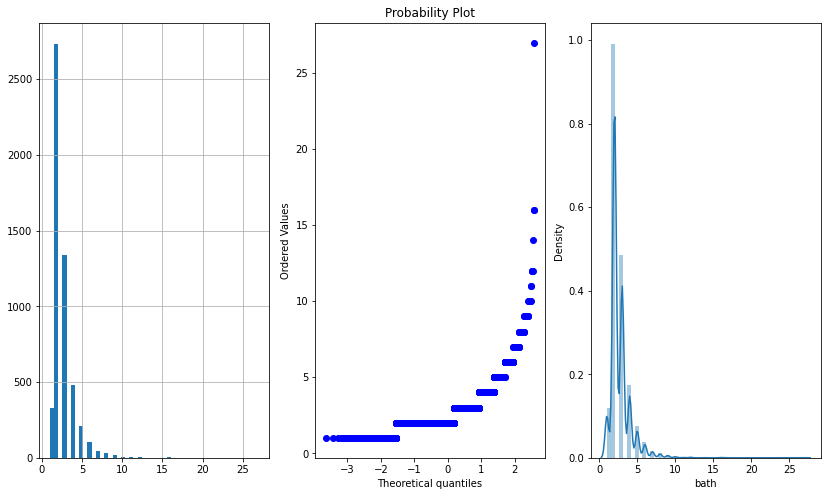

Plots for balcony cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


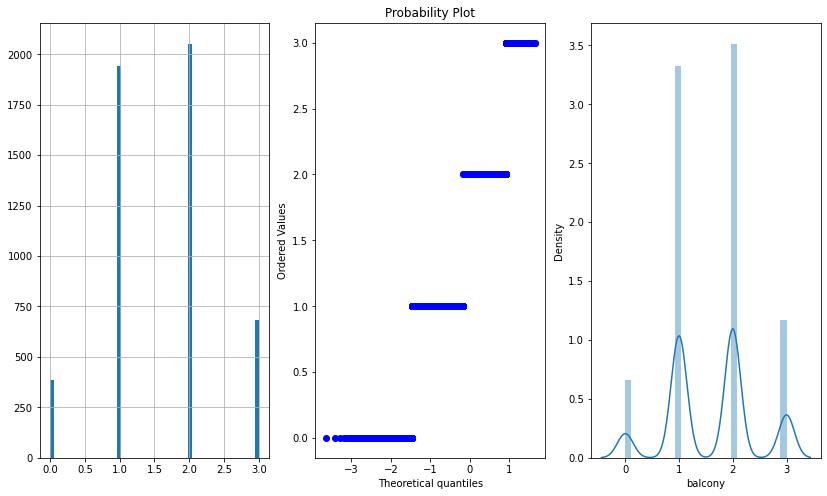

In [12]:
# Function to take in DataFrame and Variable to plot histogram and Q-Q plot
def plotvariale(X, variable, transformation):
    print("Plots for %s cloumn with %s transformation: "%(variable, transformation))
    plt.figure(figsize=(14,8))
    plt.subplot(1,3,1) ## means 1 row , 2 columns and 1st plot
    X[variable].hist(bins=50)
    
    ## QQ plot
    plt.subplot(1,3,2)
    stats.probplot(X[variable], dist="norm", plot=plt)
        
    ## fiting Histogram using distplot
    plt.subplot(1,3,3)
    sns.distplot(X[variable])
    
    plt.show()
    
    
#Check the plots for unTransformed column, Right skew indicates log transformation fits fine
transformation = 'no'
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#for column in dfx.select_dtypes(include=numerics):
#    plotvariale(dfx, column, transformation)
for column in num_cols:
    if column == 'loan_status':
        continue
    plotvariale(X, column, transformation)

#### histogram

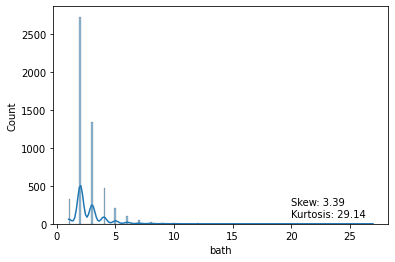

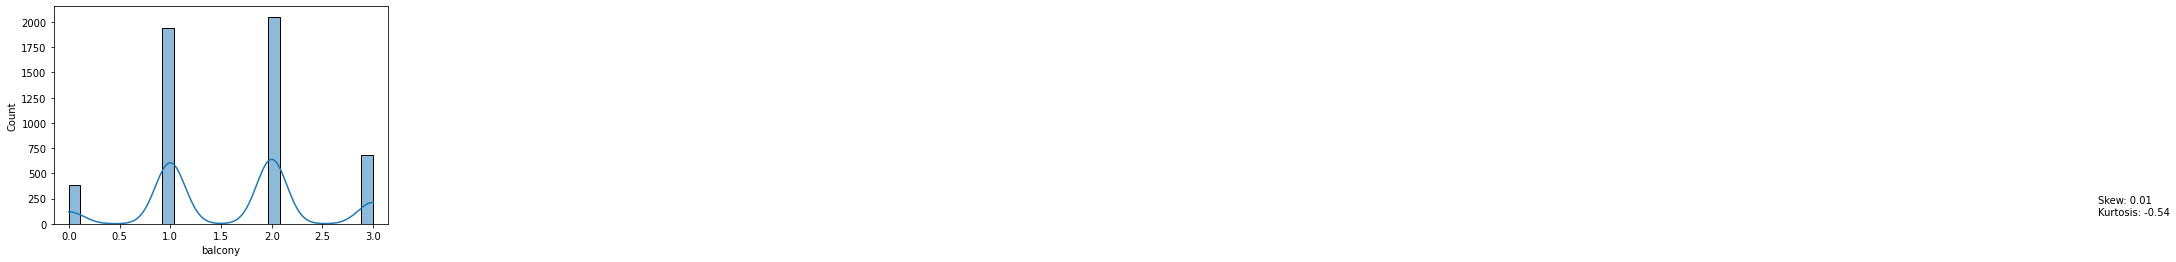

In [13]:
for col in num_cols:
    sns.histplot(X[col], element='bars', kde=True)
    plt.text(x=20, y=90, s=f"Skew: {round(X[col].skew(),2)}\nKurtosis: {round(X[col].kurt(),2)}")
    plt.show()

#### pairplot

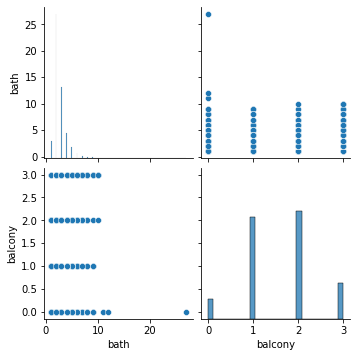

In [14]:
sns.pairplot(data=X)

## Boxed Plots for Grouping Visulaization

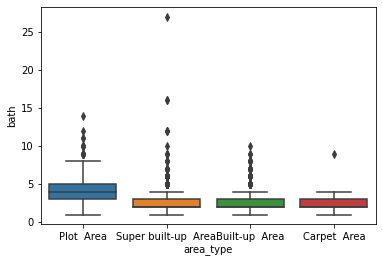

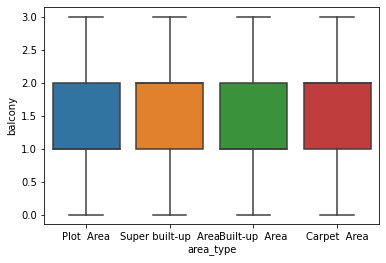

In [15]:
for col in num_cols:
    sns.boxplot(y=X[col], x=X['area_type'])
    plt.show()

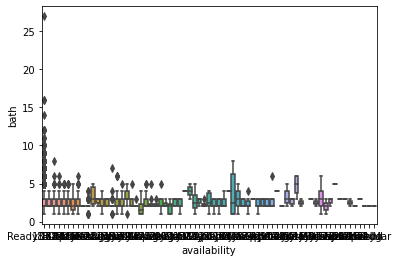

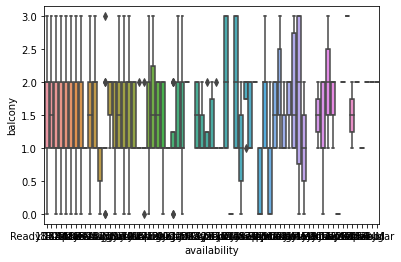

In [16]:
for col in num_cols:
    sns.boxplot(y=X[col], x=X['availability'])
    plt.show()

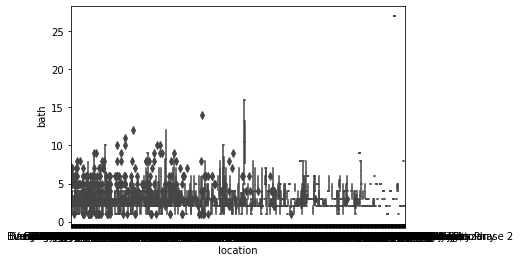

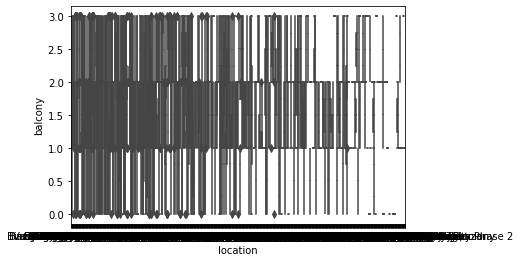

In [17]:
for col in num_cols:
    sns.boxplot(y=X[col], x=X['location'])
    plt.show()

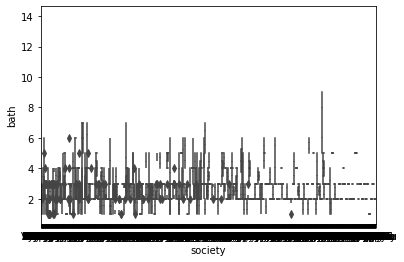

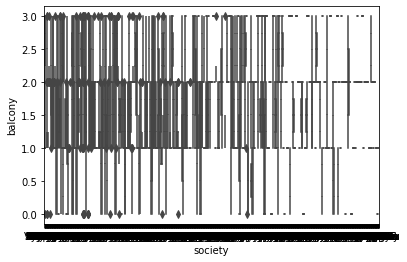

In [18]:
for col in num_cols:
    sns.boxplot(y=X[col], x=X['society'])
    plt.show()

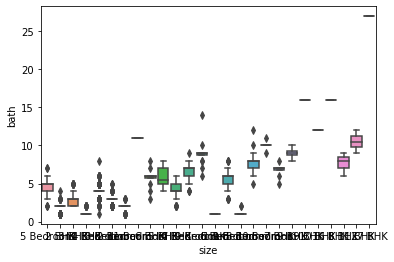

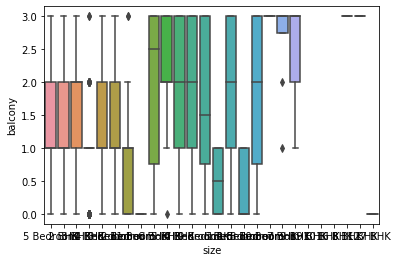

In [19]:
for col in num_cols:
    sns.boxplot(y=X[col], x=X['size'])
    plt.show()

## Study of Catogorical Columns

In [20]:
for col in cat_cols:
    print("Unique values in \"%s\" column are %s"%(col, X[col].unique()))
    print(">>Number of Unique values in the column are: ",X[col].nunique())
    print(">>Normalized counts for top 5 value are:\n",
          X[col].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=False).nlargest(5)*100)
    print("-"*124)
    

Unique values in "area_type" column are ['Plot  Area' 'Super built-up  Area' 'Built-up  Area' 'Carpet  Area']
>>Number of Unique values in the column are:  4
>>Normalized counts for top 5 value are:
 Super built-up  Area    66.741742
Built-up  Area          17.454955
Plot  Area              15.090090
Carpet  Area             0.713213
Name: area_type, dtype: float64
----------------------------------------------------------------------------------------------------------------------------
Unique values in "availability" column are ['Ready To Move' '18-Oct' '18-Apr' '18-May' '18-Mar' '19-Dec' '20-Dec'
 '18-Dec' '19-Nov' '18-Aug' '17-Aug' '21-Jul' '18-Nov' '22-Jun' '18-Jun'
 '18-Jul' '19-Mar' '19-Jun' '17-Nov' '19-Apr' '20-Aug' '18-Feb' '17-Dec'
 '21-Aug' '18-Jan' '20-Oct' '20-Jan' '19-Jul' '21-Dec' '20-May' '15-Oct'
 '20-Apr' '22-Jan' '21-Sep' '19-Oct' '21-Jan' '21-Oct' '17-Oct' '16-Jan'
 '19-Jan' '20-Sep' '17-Sep' '18-Sep' '17-Apr' '21-Jun' '21-Mar' '22-Dec'
 '19-Aug' '19-May' '17-Jun' 

##### Other analysis

In [21]:
#Unique values in a column
X['size'].unique()

array(['5 Bedroom', '2 BHK', '3 BHK', '1 BHK', '4 Bedroom', '3 Bedroom',
       '2 Bedroom', '11 Bedroom', '6 BHK', '5 BHK', '4 BHK', '7 Bedroom',
       '9 Bedroom', '1 RK', '6 Bedroom', '1 Bedroom', '8 Bedroom',
       '10 Bedroom', '7 BHK', '9 BHK', '19 BHK', '10 BHK', '16 BHK',
       '8 BHK', nan, '11 BHK', '27 BHK'], dtype=object)

In [22]:
#Operating on a column
X['size'].str.split(' ').str[0]

2086     5
3585     2
6411     3
1950     3
10979    3
        ..
5519     4
4701     3
4680     3
3098     3
429      3
Name: size, Length: 5328, dtype: object

In [23]:
#Getting null rows in a specific column
X['size'][X['size'].str.split(' ').str[0].isnull()]

8306    NaN
8565    NaN
6719    NaN
1775    NaN
Name: size, dtype: object

In [24]:
X['size'].str.split(' ').str[0].unique()

array(['5', '2', '3', '1', '4', '11', '6', '7', '9', '8', '10', '19',
       '16', nan, '27'], dtype=object)

In [25]:
X['area_type'].unique()

array(['Plot  Area', 'Super built-up  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [26]:
X['availability'].unique()

array(['Ready To Move', '18-Oct', '18-Apr', '18-May', '18-Mar', '19-Dec',
       '20-Dec', '18-Dec', '19-Nov', '18-Aug', '17-Aug', '21-Jul',
       '18-Nov', '22-Jun', '18-Jun', '18-Jul', '19-Mar', '19-Jun',
       '17-Nov', '19-Apr', '20-Aug', '18-Feb', '17-Dec', '21-Aug',
       '18-Jan', '20-Oct', '20-Jan', '19-Jul', '21-Dec', '20-May',
       '15-Oct', '20-Apr', '22-Jan', '21-Sep', '19-Oct', '21-Jan',
       '21-Oct', '17-Oct', '16-Jan', '19-Jan', '20-Sep', '17-Sep',
       '18-Sep', '17-Apr', '21-Jun', '21-Mar', '22-Dec', '19-Aug',
       '19-May', '17-Jun', '17-May', '21-May', '22-May', '17-Mar',
       'Immediate Possession', '15-Nov', '20-Jun', '19-Sep', '21-Nov',
       '17-Jul', '16-Mar', '16-Sep', '22-Nov', '20-Mar', '17-Feb',
       '21-Feb', '15-Aug', '14-Jul', '22-Mar'], dtype=object)

In [27]:
#Count of occurance in a cloumns
X['location'].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=False)

Whitefield             0.039227
Sarjapur  Road         0.031719
Electronic City        0.022523
Kanakpura Road         0.021209
Thanisandra            0.018581
                         ...   
Manjunatha Layout      0.000188
VHBCS Layout           0.000188
Rahat Bagh             0.000188
Chikkadunnasandra      0.000188
Anekal - Hosur Road    0.000188
Name: location, Length: 908, dtype: float64

In [28]:
X['location'].unique()

array(['Chikkabanavar', 'Sompura', 'Nagaraja Garden', 'Byagadadhenahalli',
       'Sarjapur  Road', 'Kalena Agrahara', 'Hagadur', 'Kudlu Gate',
       'Kenchenahalli', 'Chennammana Kere', 'Whitefield',
       'Kadugondanahalli', 'Babusapalaya', 'Vasantha Vallabha Nagar',
       'Hoodi Layout', 'Hegde Nagar', 'Nagarbhavi', 'Kadugodi',
       'TC Palaya', 'Navodaya Nagar', 'Cambridge Layout', 'Hosa Road',
       '1st Phase JP Nagar', 'Binny Pete', 'Bellandur', 'Murugeshpalya',
       'Margondanahalli', 'Marsur', 'T.C PALYA',
       'Binny Mills Employees Colony', 'Varthur', 'Ramamurthy Nagar',
       'Brookefield', 'Padmanabhanagar', 'Uttarahalli', 'Harlur',
       'ECC Road, Whitefield, ', 'Basavangudi', 'CV Raman Nagar',
       'Sanne Amanikere', 'Jalahalli East', 'Attibele',
       'Banashankari Stage III', 'Koramangala', '1 Ramamurthy Nagar',
       'Doddakallasandra', 'Iblur Village', 'Attur Layout',
       'Basaveshwara Nagar Yelahanka', 'Electronic City',
       'Sahakara Nagar', 

In [29]:
len(X['society'].unique())

1529

In [30]:
X['society'].value_counts(normalize=True, sort=True)

PrarePa    0.011118
Sryalan    0.008577
PrityTr    0.008577
GMown E    0.008259
GrrvaGr    0.008259
             ...   
Vadidpl    0.000318
SRanail    0.000318
Vidil D    0.000318
Shelash    0.000318
NiarkHy    0.000318
Name: society, Length: 1528, dtype: float64

# Outcome of the above analysis

# Saving the features Using Pickel

In [31]:
trainFeatures_list = [X, y]
testFeatures_list = [X_test, y_test]

import pathlib
path_to_write_output=str(pathlib.Path.cwd()) #Path of current working Directory
with open(path_to_write_output + '\\trainFeatures_list.pkl', 'wb') as handle:
    pickle.dump(trainFeatures_list, handle)
    
with open(path_to_write_output + '\\testFeatures_list.pkl', 'wb') as handle:
    pickle.dump(testFeatures_list, handle)